In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

### PROBLEM STATEMENT
##### XYZ CO's 2014-2018 data to to identify key revenue and profit drivers across products ,channels and regions uncover seasonal trends outliers and align performance against budgets.Use these insights to optimize pricing ,promotions and market expansion for sustainable growth and reduced concentration risk

In [4]:
sheets=pd.read_excel(r'C:\Users\LENOVO\Downloads\Regional Sales Dataset.xlsx',sheet_name=None)

In [5]:
# assign  df to each sheet
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [6]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [7]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


## DATA CLEANING AND WRANGLING

In [8]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [9]:
# merge with customers
df=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index')

In [10]:
# merge with products
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index')

In [11]:
# merge with regions
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id')

In [12]:
# merge with state regions
df=df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code')

In [13]:
# merge with budgets
df=df.merge(
    df_budgets,
    how='left',
    on='Product Name'
    )

In [14]:
df.to_csv('file.csv')

In [15]:
cols_to_drop=['Customer Index', 'Index', 'id', 'State Code']
df=df.drop(columns=cols_to_drop,errors='ignore')

In [16]:
df.shape

(64104, 30)

In [17]:
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [18]:
cols_to_keep=['ordernumber', 'orderdate','customer names','channel','product name','order quantity', 'unit price', 
              'line total', 'total unit cost', 'county', 'state_code', 'state','region','latitude', 'longitude','2017 budgets'
             ]

In [19]:
df=df[cols_to_keep]

In [21]:
# 2) Rename 
df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',     
    'customer names'   : 'customer_name', 
    'product name'     : 'product_name',  
    'order quantity'   : 'quantity',      
    'unit price'       : 'unit_price',    
    'line total'       : 'revenue',        
    'total unit cost'  : 'cost',           
    'state_code'       : 'state',       
    'state'            : 'state_name',    
    'region'           : 'us_region',     
    'latitude'         : 'lat',            
    'longitude'        : 'lon',            
    '2017 budgets'     : 'budget'          
})

# Display the cleaned DataFrame structure
df.head()
     

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,county,state_name,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [22]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


 # Feature Engineering

In [23]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month


df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,county,...,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,Bucks County,...,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,Cook County,...,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,Broward County,...,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,Erie County,...,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


# EDA

  # 1. Monthly Sales Trend Over Time

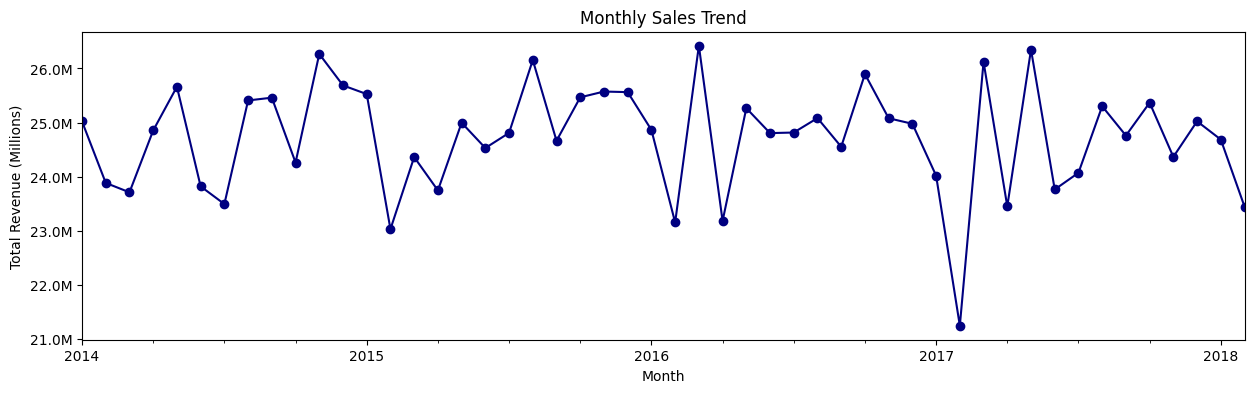

In [29]:
monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.show()

 # 2. Monthly Sales Trend (All Years Combined)

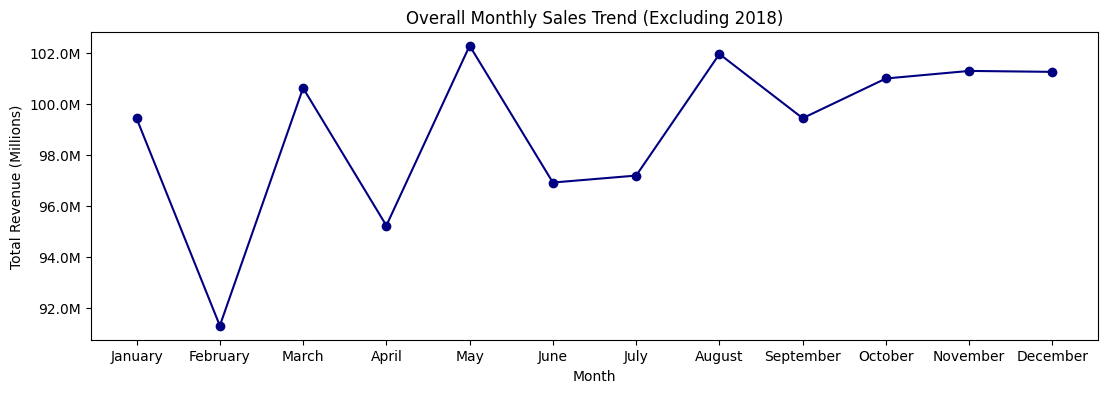

In [32]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.

monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.show()

# 3. Top 10 Products by Revenue (in Millions)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23536\2598822080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


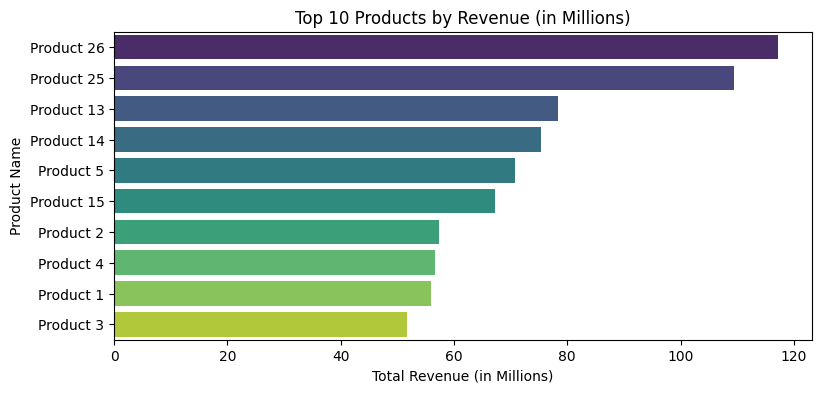

In [33]:

top_prod = df.groupby('product_name')['revenue'].sum() / 1000000


top_prod = top_prod.nlargest(10)
plt.figure(figsize=(9, 4))
sns.barplot(
    x=top_prod.values,  
    y=top_prod.index,    
    palette='viridis'     
)

plt.title('Top 10 Products by Revenue (in Millions)') 
plt.xlabel('Total Revenue (in Millions)')              
plt.ylabel('Product Name')                             
plt.show()


 # 4. Top 10 Products by Avg Profit Margin

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23536\4271064334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


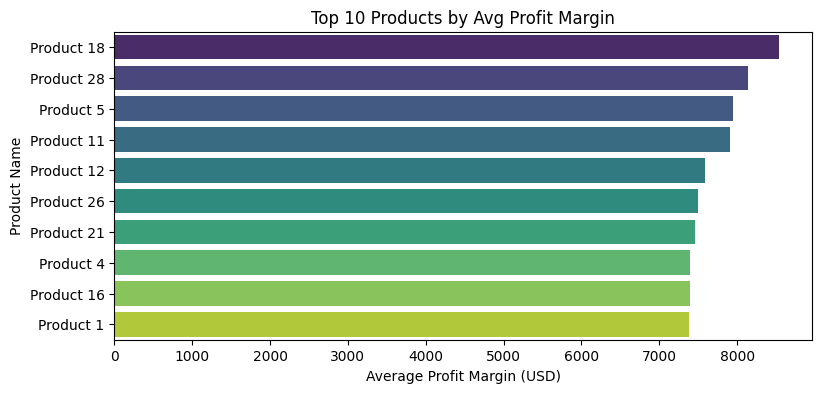

In [34]:

top_margin = (
    df.groupby('product_name')['profit'].mean().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(9, 4))

sns.barplot(
    x=top_margin.values,
    y=top_margin.index, 
    palette='viridis'     
)

plt.title('Top 10 Products by Avg Profit Margin') 
plt.xlabel('Average Profit Margin (USD)')          
plt.ylabel('Product Name')                 


plt.show()

 # 5. Sales by Channel 

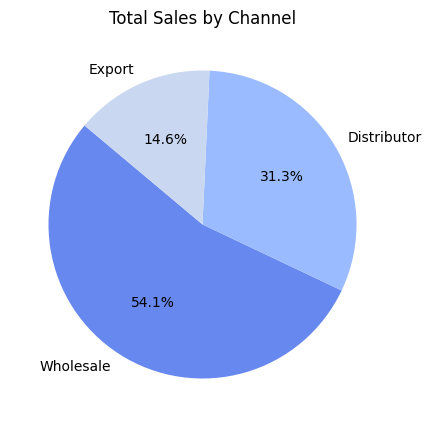

In [35]:

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))
plt.pie(
    chan_sales.values,                   
    labels=chan_sales.index,             
    autopct='%1.1f%%',                   
    startangle=140,                      
    colors=sns.color_palette('coolwarm') 
)

plt.title('Total Sales by Channel')
plt.show()
     


# 6. Average Order Value (AOV) Distribution

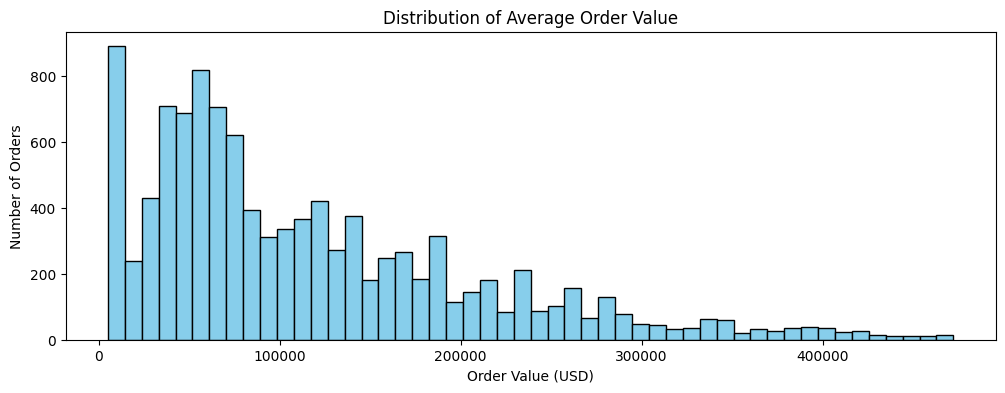

In [36]:

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12, 4))

plt.hist(
    aov,          
    bins=50,      
    color='skyblue', 
    edgecolor='black'  
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.show()
     


 # 7. Profit Margin % vs. Unit Price

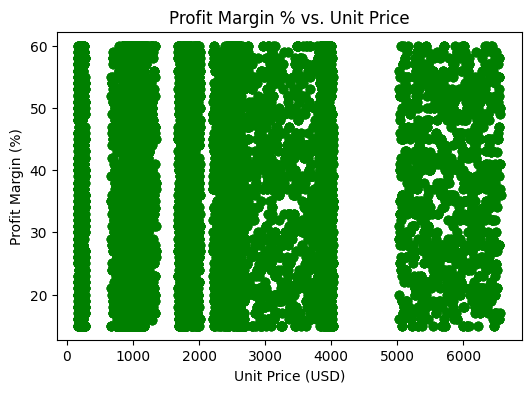

In [37]:

df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(6,4))

plt.scatter(
    df['unit_price'],          
    df['profit_margin_pct'],     
    alpha=0.6,              
    color='green'
)

plt.title('Profit Margin % vs. Unit Price')  
plt.xlabel('Unit Price (USD)')              
plt.ylabel('Profit Margin (%)')               

plt.show()

# 8. Unit Price Distribution per Product

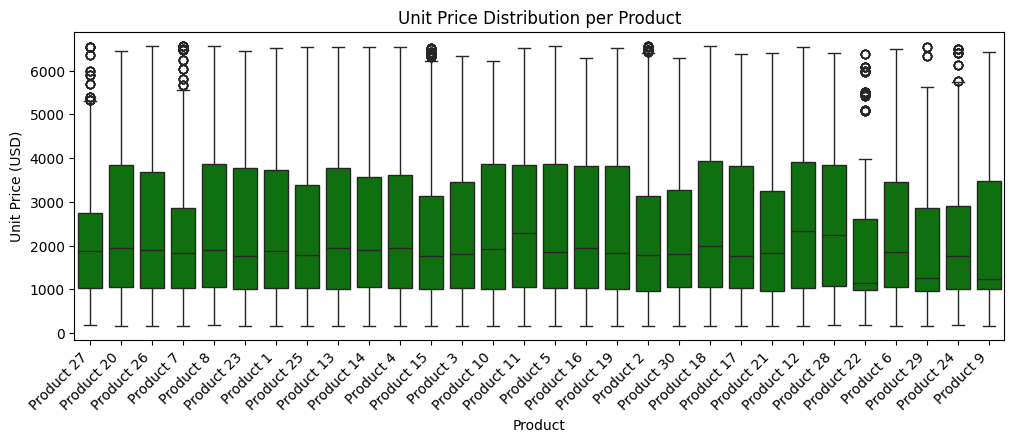

In [38]:

plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',  
    y='unit_price',    
    color='g'          
)


plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')                            
plt.ylabel('Unit Price (USD)')                   

plt.xticks(rotation=45, ha='right')

plt.show()

 # 9. Total Sales by US Region

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23536\1792358178.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


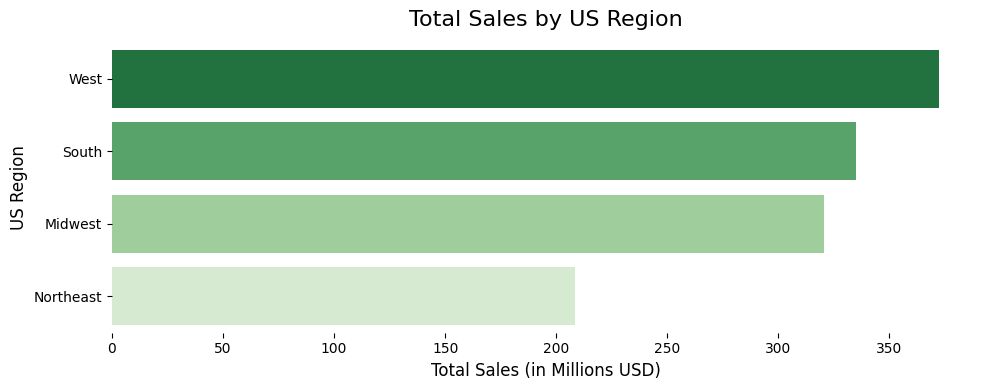

In [39]:
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False) 
    / 1e6                      
)


plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)

plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

#  10. Top 10 States by Revenue and Order Count

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23536\3156064076.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23536\3156064076.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


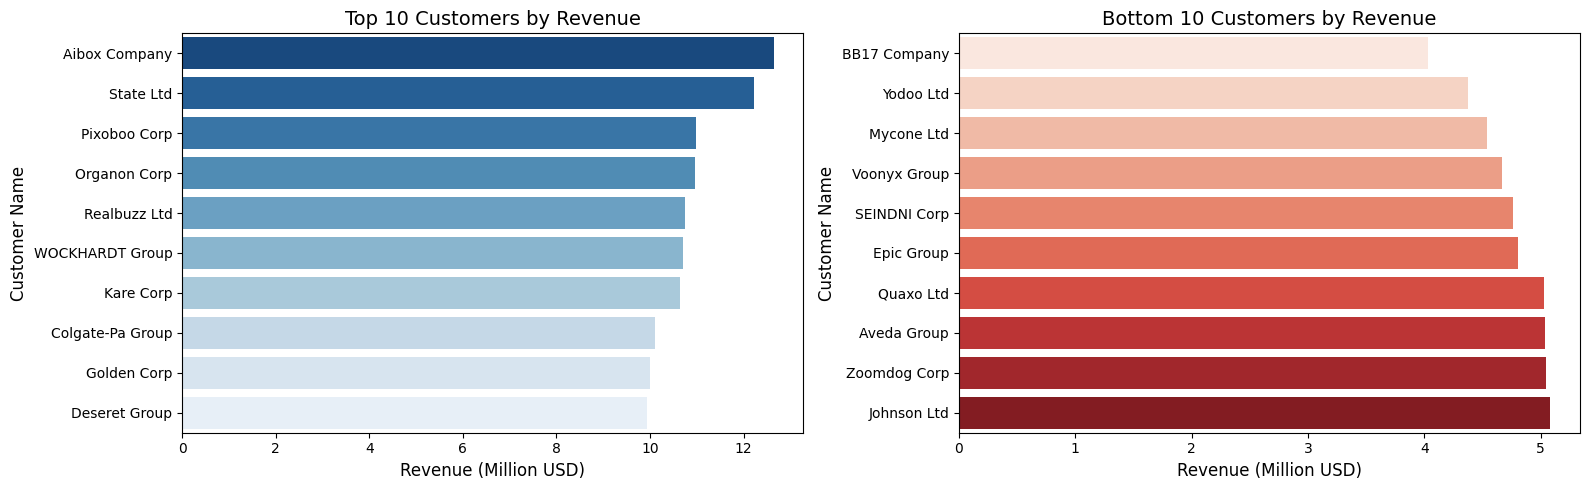

In [41]:

top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        
      .sort_values(ascending=False)
      .head(10)                   
)

#  Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                      
      .sort_values(ascending=True) 
      .head(10)                   
)


fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,   
    y=top_rev.index,          
    palette='Blues_r',     
    ax=axes[0]           
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)    
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)          
axes[0].set_ylabel('Customer Name', fontsize=12)                   

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, 
    y=bottom_rev.index,       
    palette='Reds',         
    ax=axes[1]          
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)     
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)             
axes[1].set_ylabel('Customer Name', fontsize=12)               


plt.tight_layout()
plt.show()


# 11.Customer Segmentation: Revenue vs. Profit Margin

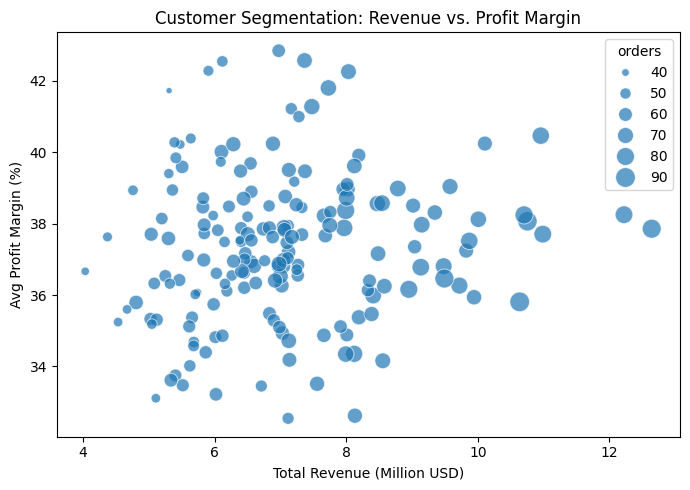

In [46]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


# 12.Correlation Heatmap of Numeric Features

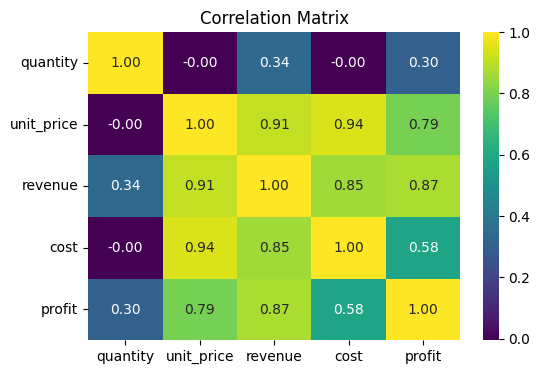

In [48]:

num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))

sns.heatmap(
    corr,          
    annot=True,   
    fmt=".2f",  
    cmap='viridis'
)

plt.title('Correlation Matrix')

plt.show()

In [49]:

df.to_csv('Sales_data(EDA Exported).csv', index=False)